# Create Segmentation Mask from Geopackage Labels

In this tutorial, we provide an example to generate semantic segmentation masks given semantic labels in geopackage (`.gpkg`) format. In the v0.2 version of Arnsberg Forest Dataset, field-D is annotated with the following classes:
* `CUT`
* `CWD`
* `MISC`
* `STUMP`
* `VEGETATION`

Here you can also combine different class into the same label, for example we want to treat `CUT` and `STUMP` as the same label

In [4]:
import os
import warnings

import rasterio
from rasterio.plot import show

from gdl.datasets.utils import create_mask

warnings.filterwarnings("ignore")

In [5]:
# Paths to the raster image file
field_D_path = "../../../field-D"
raster_image_source = os.path.join(field_D_path, "d-RGB-9mm-reference.tif")

# Create a dictionary of geopackages with the label and path to the geopackage
# CUT and STUMP are treated as one label
geopackages = {
    "CUT": {"label": 3,
              "path": os.path.join(field_D_path, "labels-rc1", "CUT.gpkg")},
    "CWD": {"label": 1,
            "path": os.path.join(field_D_path, "labels-rc1", "CWD.gpkg")},
    "MISC":{"label": 2,
            "path": os.path.join(field_D_path, "labels-rc1", "MISC.gpkg")},
    "STUMP": {"label": 3,
              "path": os.path.join(field_D_path, "labels-rc1", "STUMP.gpkg")},
    "VEGETATION":{"label": 4,    
                  "path": os.path.join(field_D_path, "labels-rc1", "VEGETATION.gpkg")}
}

mask_output_path = "./mask_output"
create_mask(raster_image_source, geopackages, mask_output_path=mask_output_path)

CUT RGB color: 3
CWD RGB color: 1
MISC RGB color: 2
STUMP RGB color: 3
VEGETATION RGB color: 4
Raster image mask is saved to: ./mask_output/d-RGB-9mm-reference_mask.tif


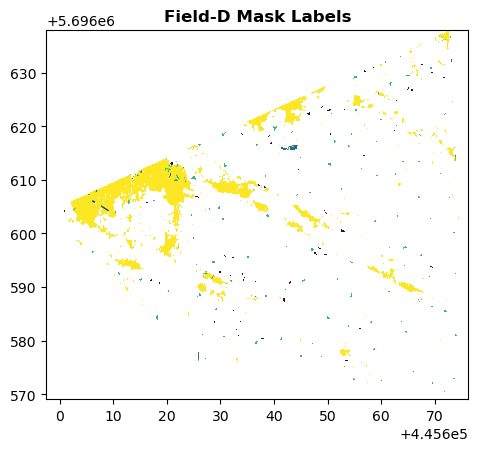

<Axes: title={'center': 'Field-D Mask Labels'}>

In [6]:
# show 8 bit masks
show(rasterio.open('mask_output/d-RGB-9mm-reference_mask.tif'), title="Field-D Mask Labels")